In [119]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

from sklearn import datasets
from sklearn.base import clone
from sklearn.linear_model import LinearRegression, SGDRegressor, LogisticRegression
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline

### The Normal Equation (closed form)

In [3]:
# Data generation
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)

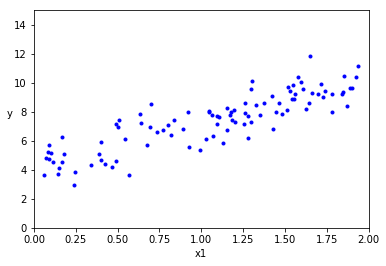

In [12]:
plt.plot(X, y, 'b.')
plt.xlabel('x1')
plt.ylabel('y', rotation=0)
plt.axis([0, 2, 0, 15])
plt.show()

In [15]:
X_b = np.c_[np.ones((100, 1)), X]
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)
theta_best

array([[4.2044019 ],
       [3.01359482]])

In [16]:
X_new = np.array([[0], [2]])
X_new_b = np.c_[np.ones((2, 1)), X_new]
y_predict = X_new_b.dot(theta_best)
y_predict

array([[ 4.2044019 ],
       [10.23159155]])

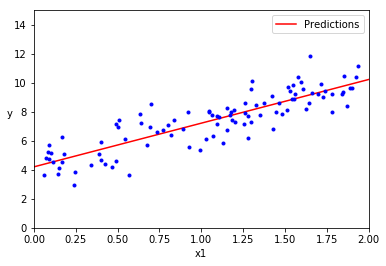

In [22]:
plt.plot(X_new, y_predict, 'r-', label='Predictions')
plt.legend()
plt.plot(X, y, 'b.')
plt.axis([0, 2, 0, 15])
plt.xlabel('x1')
plt.ylabel('y', rotation=0)
plt.show()

In [25]:
lin_reg = LinearRegression()
lin_reg.fit(X, y)
lin_reg.intercept_, lin_reg.coef_

(array([4.2044019]), array([[3.01359482]]))

In [26]:
lin_reg.predict(X_new)

array([[ 4.2044019 ],
       [10.23159155]])

### Batch Gradient Descent

In [27]:
eta = 0.1 # learning rate
n_iterations = 1000
m = 100

In [28]:
theta = np.random.randn(2, 1) # random initialization

for iteration in range(n_iterations):
    gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
    theta = theta - eta * gradients

In [29]:
theta

array([[4.2044019 ],
       [3.01359482]])

In [30]:
theta_path_bgd = []

def plot_gradient_descent(theta, eta, theta_path=None):
    m = len(X_b)
    plt.plot(X, y, "b.")
    n_iterations = 1000
    for iteration in range(n_iterations):
        if iteration < 10:
            y_predict = X_new_b.dot(theta)
            style = "b-" if iteration > 0 else "r--"
            plt.plot(X_new, y_predict, style)
        gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
        theta = theta - eta * gradients
        if theta_path is not None:
            theta_path.append(theta)
    plt.xlabel("$x_1$", fontsize=18)
    plt.axis([0, 2, 0, 15])
    plt.title(r"$\eta = {}$".format(eta), fontsize=16)

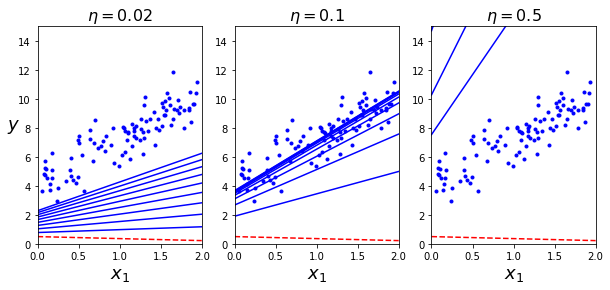

In [32]:
np.random.seed(42)
theta = np.random.randn(2,1)  # random initialization

plt.figure(figsize=(10,4))
plt.subplot(131); plot_gradient_descent(theta, eta=0.02)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.subplot(132); plot_gradient_descent(theta, eta=0.1, theta_path=theta_path_bgd)
plt.subplot(133); plot_gradient_descent(theta, eta=0.5)

plt.show()

### Stochastic Gradient Descent

In [48]:
n_epochs = 50
t0, t1 = 5, 50 # learning schedule parameters
m = len(X_b)
np.random.seed(42)

In [49]:
def learning_schedule(t):
    return t0 / (t + t1)

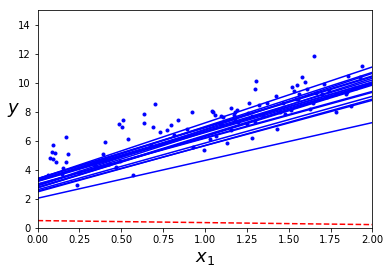

In [50]:
theta = np.random.randn(2, 1) # random initialization
theta_path_sgd = []

for epoch in range(n_epochs):
    for i in range(m):
        # For plotting
        if epoch == 0 and i < 20:
            y_predict = X_new_b.dot(theta)
            style = "b-" if i > 0 else "r--"
            plt.plot(X_new, y_predict, style)
        random_index = np.random.randint(m)
        xi = X_b[random_index:random_index+1]
        yi = y[random_index:random_index+1]
        gradients = 2 * xi.T.dot(xi.dot(theta) - yi)
        eta = learning_schedule(epoch * m + i)
        theta = theta - eta * gradients
        theta_path_sgd.append(theta)
    
plt.plot(X, y, "b.")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([0, 2, 0, 15])
plt.show()

In [37]:
theta

array([[4.14515989],
       [3.01798343]])

In [52]:
sgd_reg = SGDRegressor(n_iter=50, penalty=None, eta0=0.1)
sgd_reg.fit(X, y.ravel())

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.1,
       fit_intercept=True, l1_ratio=0.15, learning_rate='invscaling',
       loss='squared_loss', max_iter=None, n_iter=50, penalty=None,
       power_t=0.25, random_state=None, shuffle=True, tol=None, verbose=0,
       warm_start=False)

In [53]:
sgd_reg.intercept_, sgd_reg.coef_

(array([4.24009477]), array([3.04074334]))

### Polynomial Regression

In [54]:
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 0.5 * X**2 + X + 2 + np.random.randn(m, 1)

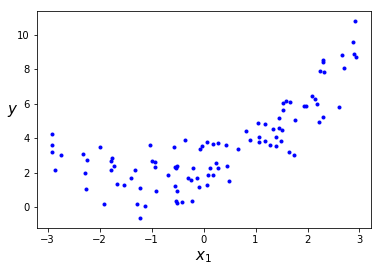

In [60]:
plt.plot(X, y, 'b.')
plt.xlabel('$x_1$', fontsize=15)
plt.ylabel('$y$', rotation=0, fontsize=15)
plt.show()

In [62]:
# Adding squares of the features
poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X)
X[0]

array([1.97322766])

In [63]:
X_poly[0]

array([1.97322766, 3.89362739])

In [64]:
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)
lin_reg.intercept_, lin_reg.coef_

(array([2.19573036]), array([[1.00978737, 0.4681429 ]]))

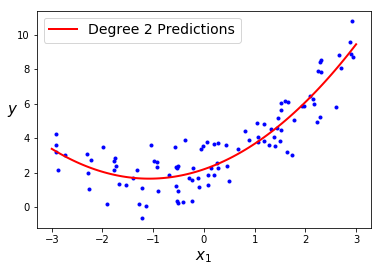

In [78]:
X_new = np.linspace(-3, 3, 100).reshape(100, 1)
X_new_poly = poly_features.transform(X_new)
y_new = lin_reg.predict(X_new_poly)
plt.plot(X, y, "b.")
plt.plot(X_new, y_new, "r-", linewidth=2, label="Degree 2 Predictions")
plt.xlabel("$x_1$", fontsize=15)
plt.ylabel("$y$", rotation=0, fontsize=15)
plt.legend(loc="upper left", fontsize=14)
plt.show()

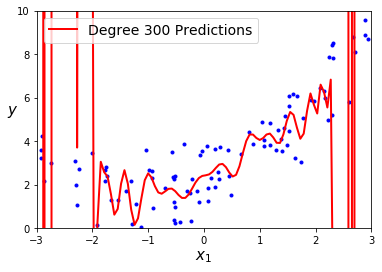

In [79]:
# Overfitting example
poly_300_features = PolynomialFeatures(degree=300, include_bias=False)
X_300_poly = poly_300_features.fit_transform(X)

scaler = StandardScaler()
scaled_X_300_poly = scaler.fit_transform(X_300_poly)

lin_reg_300 = LinearRegression()
lin_reg_300.fit(scaled_X_300_poly, y)

X_300_new = np.linspace(-3, 3, 100).reshape(100, 1)
X_300_new_poly = poly_300_features.transform(X_300_new)
scaled_X_300_new_poly = scaler.transform(X_300_new_poly)
y_300_new = lin_reg_300.predict(scaled_X_300_new_poly)
plt.plot(X, y, "b.")
plt.plot(X_300_new, y_300_new, "r-", linewidth=2, label="Degree 300 Predictions")
plt.xlabel("$x_1$", fontsize=15)
plt.ylabel("$y$", rotation=0, fontsize=15)
plt.legend(loc="upper left", fontsize=14)
plt.axis([-3, 3, 0, 10])
plt.show()

### Learning Curves

In [89]:
def plot_learning_curves(model, X, y):
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2)
    train_errors, val_errors = [], []
    for m in range(1, len(X_train)):
        model.fit(X_train[:m], y_train[:m])
        y_train_predict = model.predict(X_train[:m])
        y_val_predict = model.predict(X_val)
        train_errors.append(mean_squared_error(y_train_predict, y_train[:m]))
        val_errors.append(mean_squared_error(y_val_predict, y_val))
    plt.plot(np.sqrt(train_errors), 'r-+', linewidth=2, label='train')
    plt.plot(np.sqrt(val_errors), 'b-', linewidth=3, label='val')
    plt.axis([0, 80, 0.0, 3.0])
    plt.legend()

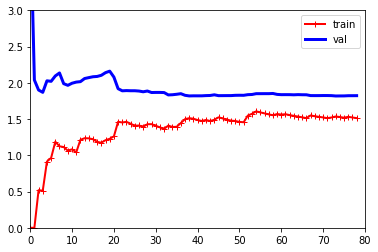

In [90]:
lin_reg = LinearRegression()
plot_learning_curves(lin_reg, X, y)

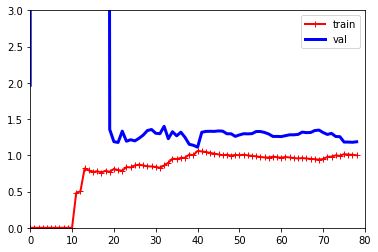

In [92]:
polynomial_regression = Pipeline((
    ('poly_features', PolynomialFeatures(degree=10, include_bias=False)),
    ('lin_reg', LinearRegression())
))

plot_learning_curves(polynomial_regression, X, y)

#### A Few things to note
* The error on the training data with PolynomialRegression is much lower than with the LinearRegression
* If the gap between curves is wide, it means overfitting.

### Bias /Variance Tradeoff
* Bias
 * A high-bias model is most likely to underfit tha training data.
* Variance
 * A model with many degrees of freedom is likely to have high variance, and thus to overfit tha training data.
* Model complexity
 * Increasing a model's complexity will typically increase its variance and reduce its bias.
 * Reducing a model's complexity increases its bias and reduces its variance.

### Regularized Models
* Ridge Regression
* Lasso Regression
* Elastic Net

Lasso Regression and Elastic Net tend to reduce the useless features' weights down to zero.

In [100]:
ridge_reg = SGDRegressor(penalty='l2')
ridge_reg.fit(X, y.ravel())
ridge_reg.predict([[1.5]])

//anaconda/envs/rl/lib/python3.5/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDRegressor'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


array([4.28035003])

In [101]:
lasso_reg = SGDRegressor(penalty='l1')
lasso_reg.fit(X, y.ravel())
lasso_reg.predict([[1.5]])

//anaconda/envs/rl/lib/python3.5/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDRegressor'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


array([4.30261551])

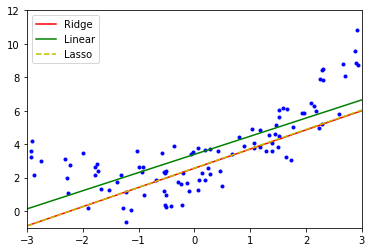

In [104]:
X_new = [[-3], [3]]
y_ridge_predict = ridge_reg.predict(X_new)
y_lasso_predict = lasso_reg.predict(X_new)
y_linear_predict = lin_reg.predict(X_new)

plt.plot(X, y, 'b.')
plt.plot(X_new, y_ridge_predict, 'r-', label='Ridge')
plt.plot(X_new, y_linear_predict, 'g-', label='Linear')
plt.plot(X_new, y_lasso_predict, 'y--', label='Lasso')
plt.axis([-3, 3, -1, 12])
plt.legend()
plt.show()

### Early Stopping

In [113]:
X_train, X_val, y_train, y_val = train_test_split(X[:50], y[:50].ravel(), test_size=0.5, random_state=10)

poly_scaler = Pipeline([
        ("poly_features", PolynomialFeatures(degree=90, include_bias=False)),
        ("std_scaler", StandardScaler()),
    ])

X_train_poly_scaled = poly_scaler.fit_transform(X_train)
X_val_poly_scaled = poly_scaler.transform(X_val)

# By setting warm_start=True, trainings start where it left off
sgd_reg = SGDRegressor(n_iter=1, warm_start=True, penalty=None,
                       learning_rate='constant', eta0=0.0005)

minimum_val_error = float('inf')
best_epoch = None
best_model = None

for epoch in range(1000):
    sgd_reg.fit(X_train_poly_scaled, y_train)
    y_val_predict = sgd_reg.predict(X_val_poly_scaled)
    val_error = mean_squared_error(y_val_predict, y_val)
    if val_error < minimum_val_error:
        minimum_val_error = val_error
        best_epoch = epoch
        best_model = clone(sgd_reg)

In [114]:
best_epoch, best_model

(387, SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
        fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
        loss='squared_loss', max_iter=None, n_iter=1, penalty=None,
        power_t=0.25, random_state=None, shuffle=True, tol=None, verbose=0,
        warm_start=True))

### Logistic Regression

In [117]:
iris = datasets.load_iris()
list(iris.keys())

['target', 'target_names', 'DESCR', 'feature_names', 'data']

In [118]:
X = iris['data'][:, 3:] # petal width
y = (iris['target'] == 2).astype(np.int) # 1 if Iris-Virginica, else 0

In [120]:
log_reg = LogisticRegression()
log_reg.fit(X, y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

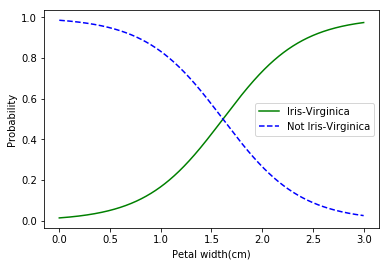

In [123]:
X_new = np.linspace(0, 3, 1000).reshape(-1, 1)
y_proba = log_reg.predict_proba(X_new)
plt.plot(X_new, y_proba[:, 1], 'g-', label='Iris-Virginica')
plt.plot(X_new, y_proba[:, 0], 'b--', label='Not Iris-Virginica')
plt.xlabel('Petal width(cm)')
plt.ylabel('Probability')
plt.legend()
plt.show()

In [124]:
log_reg.predict([[1.7], [1.5]])

array([1, 0])

In [125]:
X = iris['data'][:, (2, 3)] # petal length, petal width
y = iris['target']

softmax_reg = LogisticRegression(multi_class='multinomial', solver='lbfgs', C=10)
softmax_reg.fit(X, y)

LogisticRegression(C=10, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='multinomial',
          n_jobs=1, penalty='l2', random_state=None, solver='lbfgs',
          tol=0.0001, verbose=0, warm_start=False)

In [126]:
softmax_reg.predict([[5, 2]])

array([2])

In [127]:
softmax_reg.predict_proba([[5, 2]])

array([[6.33134076e-07, 5.75276067e-02, 9.42471760e-01]])